<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/3.%20Image%20Processing/6_ImageProcessing_Gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Image Processing (Gradients)

It is an extension of Morphological operators. <b> This concept will help us understand the edge detection that can be used in operators such as object detection, object rtacking and even image classification.</b>

<i> An image gradient is a directional change in the intensity or color in an image</i>

In this section, we will discuss <b> Sobel Feldman Operators</b> and later we will discuss general edge detection

<b> Gradients </b> can be calculated in a specific direction:

![alt text](https://drive.google.com/uc?id=1Fux_YAOyTzhPprYT_eQTNf_YCPu-bmpu)

<i> Here the picture of cat is with $x-$ directional gradient and another $y-$ directional calculated calculated </i>


---

Let's take an example:

- Here we have an image of bike stand with bricks in the back which has both vertical and horizontal lines (image 1).

![alt text](https://drive.google.com/uc?id=1KX31xlBzxrJoSLTAlwA5yACBA3YYcejD)

- <b> Normalized  $x-$ gradient from Sobel Feldman Operator </b> : We get seeing things in <b> vertical axis (vertical edges) </b> and no horizontal lines (image2).
- <b> Normalized  $y-$ gradient from Sobel Feldman Operator </b> : We get seeing things in <b> horizontal axis (horizontal edges) </b> and no vertical lines (image3).
- <b> Normalized  gradient magnitude form </b> : We get seeing things in <b> both horizontal and vertical axis </b> (Edge Detection) - image4.


---

Mathematics behind Gradients:

- Gradient operator uses two $3\times3$ kernels which can be convolved with original image to calculate approximations of the derivates <b> (one for horizontal changes and one for vertical)</b>
- If $\textbf{A}$ is source image and $G_x,G_y$ are two images which at each point contains horizontal and vertical derivative approximations respectively, the computations are as follows:

\begin{align*}
G_x = \begin{bmatrix}
+1 & 0 & -1\\
+2 & 0 & -2\\
+1 & 0 & -1
\end{bmatrix}*\textbf{A}
\qquad
G_y = \begin{bmatrix}
+1 & +2 & +1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix}*\textbf{A}
\end{align*}

where $*$ denotes 2D signal processing convolution operations. So after decomposing Sobel kernels as products of averaging and differentiation kernel, they compute gradient for smoothing.

So, $G_x,G_y$ can be written as

\begin{align*}
G_x = \begin{bmatrix}
1 \\
2\\
1
\end{bmatrix}*(\begin{bmatrix}
+1 & 0 & -1\\
\end{bmatrix}*\textbf{A})
\qquad
G_y = \begin{bmatrix}
+1 \\
0\\
-1
\end{bmatrix}*(\begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix}*\textbf{A})
\end{align*}

And resultant gradient approximations ca be combined to give gradient magnitude:

\begin{align*}
\textbf{G}=\sqrt{\textbf{G}_x^2+\textbf{G}_y^2}
\end{align*}

And gradient direction is:

\begin{align*}
\theta=\tan^{-1}\bigg(\dfrac{G_y}{G_x}\bigg)
\end{align*}

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#DISPLAY IMAGE FUNCTION
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

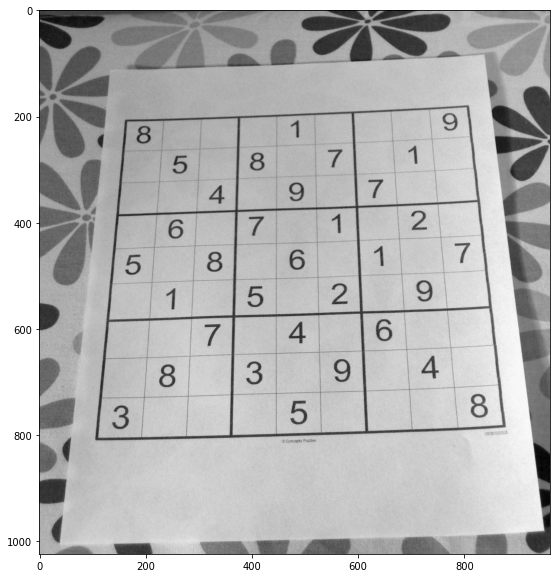

In [7]:
#Sudoko puzzle

img = cv2.imread('sudoku.jpg',0)
display_img(img)

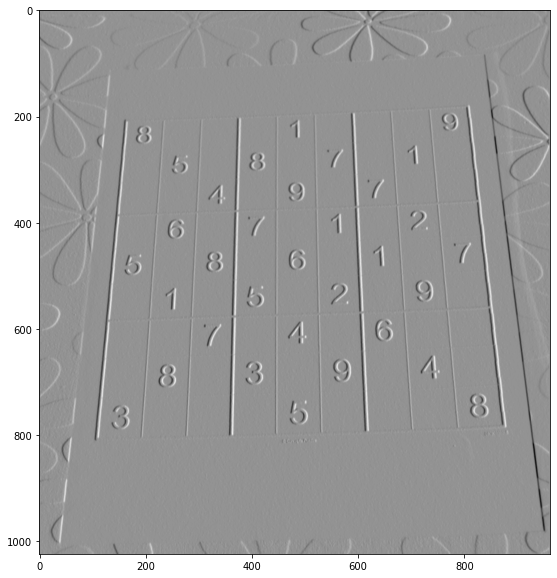

In [8]:
#implementing sobel x-gradient 

sobel_x = cv2.Sobel(img,ddepth=cv2.CV_64F,
                    dx=1,dy=0,ksize=5)
#ddepth is the precision of each pixel (typically between 8/24/32 bit for displaying but any precision for computations). Also referred as data typ[e of pixel]
display_img(sobel_x)

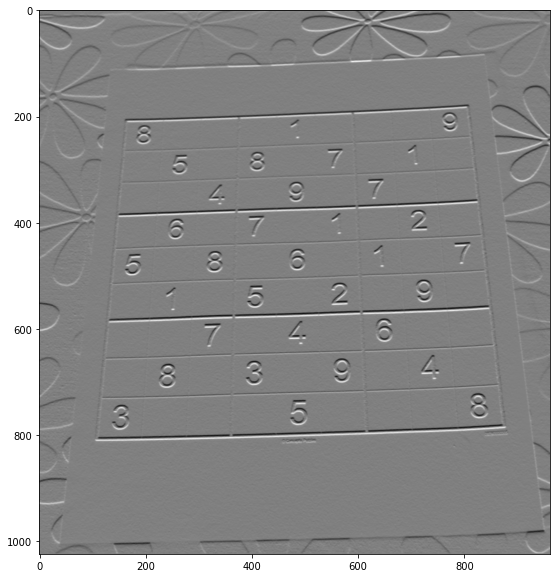

In [9]:
#implementing sobel y-gradient 

sobel_y = cv2.Sobel(img,ddepth=cv2.CV_64F,
                    dx=0,dy=1,ksize=5)
#ddepth is the precision of each pixel (typically between 8/24/32 bit for displaying but any precision for computations). Also referred as data typ[e of pixel]
display_img(sobel_y)

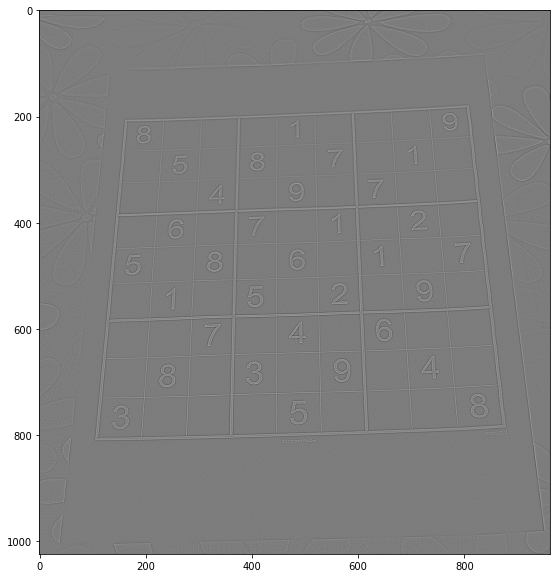

In [10]:
# Laplace operator based gradient for Sobel operators

laplacian = cv2.Laplacian(img,ddepth=cv2.CV_64F)
display_img(laplacian)

#Got bit rid of noise and can detect edges in both axis

Maybe the result with laplacian is not that well good, so we can use image processing techniques such as blending to make it look good

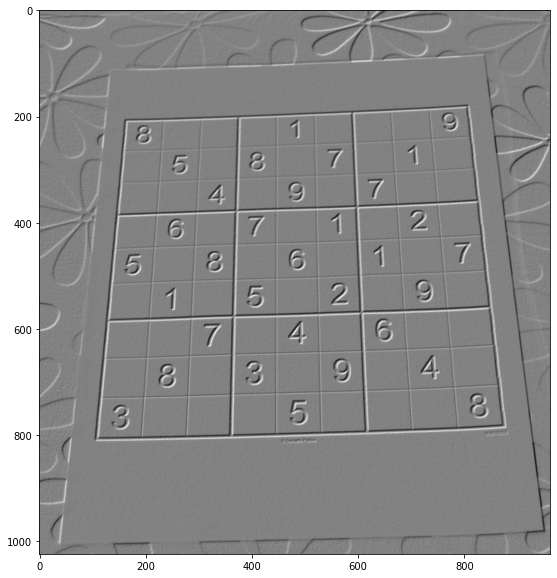

In [11]:
blended =cv2.addWeighted(src1=sobel_x,alpha=0.5,
                         src2=sobel_y,beta=0.5,
                         gamma=0)

display_img(blended)

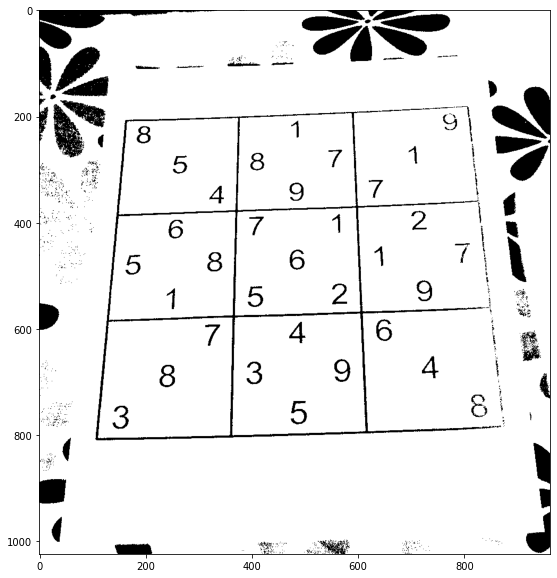

In [12]:
#Thresholding

ret,th1 = cv2.threshold(img, 100,255,
                        cv2.THRESH_BINARY)
display_img(th1)

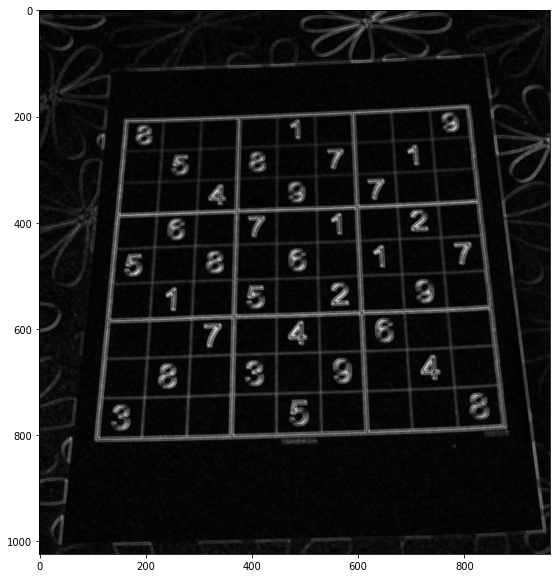

In [13]:
#morpholgical gradient operator

kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

display_img(gradient)